In [ ]:
#https://www.ritchieng.com/machine-learning-project-customer-segments/

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
#import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [1]:
#READ DATA

In [21]:
data = pd.read_excel('data.xlsx', sheet_name = 'Data')

In [61]:
dta_prio = data.filter(['xxx','xxx', 'xxx'])

In [62]:
#get dummies
dta_baggrund = pd.get_dummies(data[['xxx', 'xxx']])

In [65]:
data_num = pd.concat([dta_baggrund, dta_prio], axis=1, join='inner').dropna()
data_num

,Hvad er dit køn?_Kvinde,Hvad er dit køn?_Mand,Hvad er din alder?.1_18-34 år,Hvad er din alder?.1_35-49 år,Hvad er din alder?.1_50-75 år,Hvilken region er du bosat i?_Region Hovedstaden,Hvilken region er du bosat i?_Region Midtjylland,Hvilken region er du bosat i?_Region Nordjylland,Hvilken region er du bosat i?_Region Sjælland,Hvilken region er du bosat i?_Region Syddanmark,...,Klima og miljø,Folkeskolen,Skat,Trafik og kollektiv transport,Sociale tilbud og service i forhold til udsatte grupper,Indsatsen for integration af flygtningen og indvandrere,Daginstitutioner og folkeskolen,Erhvervsudvikling,Boligpolitik,"Kultur-, sports- og fritidstilbud"
0,0,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,0,1,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
4,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7629,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7630,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
7631,0,1,0,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
7632,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [66]:
scalar = StandardScaler()
segementation_std = scalar.fit_transform(data_num)
segementation_std

array([[-0.9464164 ,  0.9464164 ,  3.14239461, ..., -0.405061  ,
        -0.36833939, -0.42694589],
       [ 1.05661736, -1.05661736, -0.31822865, ..., -0.405061  ,
        -0.36833939, -0.42694589],
       [ 1.05661736, -1.05661736, -0.31822865, ..., -0.405061  ,
        -0.36833939, -0.42694589],
       ...,
       [-0.9464164 ,  0.9464164 , -0.31822865, ..., -0.405061  ,
        -0.36833939, -0.42694589],
       [ 1.05661736, -1.05661736, -0.31822865, ..., -0.405061  ,
        -0.36833939, -0.42694589],
       [ 1.05661736, -1.05661736, -0.31822865, ..., -0.405061  ,
        -0.36833939, -0.42694589]])

In [67]:
pca = PCA()
pca.fit(segementation_std)

PCA()

In [68]:
#the attribute show how much of the variance is explained by each of the components
pca.explained_variance_ratio_

array([1.16510034e-01, 7.71505849e-02, 7.59310758e-02, 5.82859865e-02,
       5.77906382e-02, 5.67161027e-02, 5.30640371e-02, 5.14500474e-02,
       5.01594728e-02, 4.82000104e-02, 4.63125927e-02, 4.51155569e-02,
       4.42474183e-02, 4.32966920e-02, 4.16955659e-02, 4.03445561e-02,
       3.94112474e-02, 3.49282459e-02, 1.93901352e-02, 1.18460871e-31,
       2.13323723e-32, 1.55160422e-32])

Text(0, 0.5, 'Cumulative explained variance')

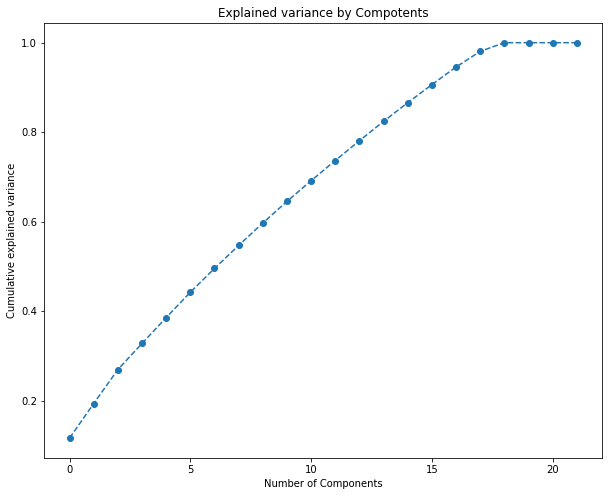

In [69]:
plt.figure(figsize = (10,8))
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by Compotents')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')

In [70]:
#as a rule of thumb, we like preserve 80% variance, why we keep 12 components
pca = PCA(n_components = 12)

In [71]:
#fit the model to our data with the selected number of components
pca.fit(segementation_std)

PCA(n_components=12)

In [72]:
scores_pca = pca.transform(segementation_std)

# K-means

In [73]:
#fit k means using the transformed data from the pca

wcss = []

for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++', random_state =42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

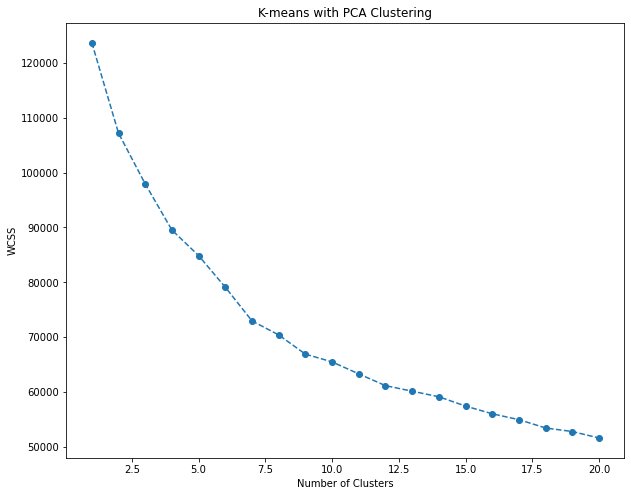

In [74]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.title('K-means with PCA Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [75]:
kmeans_pca = KMeans(n_clusters =3, init = 'k-means++', random_state = 42)

In [76]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [77]:
df_segm_pca_kmeans = pd.concat([dta.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)

In [78]:
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head(3)

,Hvad er dit køn?,Hvad er din alder?.1,Hvilken region er du bosat i?,Ældrepleje/Sundhed,Beskæftigelses- og arbejdsmarkedspolitik,Klima og miljø,Folkeskolen,Skat,Trafik og kollektiv transport,Sociale tilbud og service i forhold til udsatte grupper,...,3,4,5,6,7,8,9,10,11,Segment K-means PCA
0,Mand,18-34 år,Region Midtjylland,0,0,0,1,0,0,0,...,2.426028,-0.591615,-0.890634,1.166428,1.117936,-0.338488,3.389122,-0.071834,-0.780085,1
1,Kvinde,50-75 år,Region Midtjylland,0,0,0,1,0,0,0,...,1.329395,0.527693,-1.138928,1.159627,-0.469459,-1.213807,1.102571,1.000732,0.093340,0
2,Kvinde,50-75 år,Region Midtjylland,0,0,0,1,0,0,1,...,1.375922,0.080083,-1.770635,1.017535,-1.132591,-0.583682,0.902800,-0.127322,0.685562,0


In [79]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'one', 1:'two', 2:'three'})

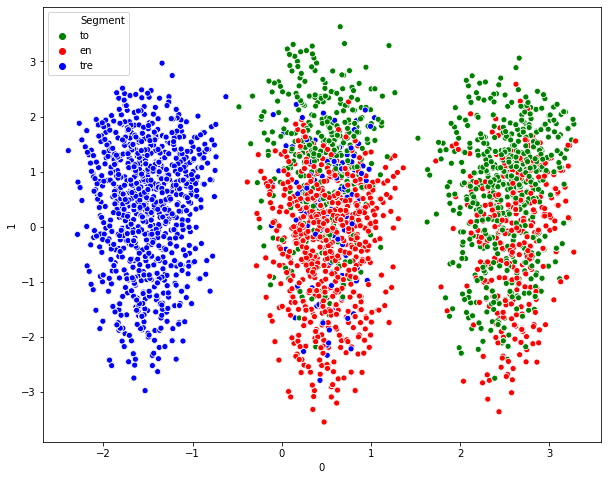

In [80]:
x_axis = df_segm_pca_kmeans[0]
y_axis = df_segm_pca_kmeans[1]

plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'b'])

In [81]:
df_segm_pca_kmeans

,Hvad er dit køn?,Hvad er din alder?.1,Hvilken region er du bosat i?,Ældrepleje/Sundhed,Beskæftigelses- og arbejdsmarkedspolitik,Klima og miljø,Folkeskolen,Skat,Trafik og kollektiv transport,Sociale tilbud og service i forhold til udsatte grupper,...,4,5,6,7,8,9,10,11,Segment K-means PCA,Segment
0,Mand,18-34 år,Region Midtjylland,0,0,0,1,0,0,0,...,-0.591615,-0.890634,1.166428,1.117936,-0.338488,3.389122,-0.071834,-0.780085,1,to
1,Kvinde,50-75 år,Region Midtjylland,0,0,0,1,0,0,0,...,0.527693,-1.138928,1.159627,-0.469459,-1.213807,1.102571,1.000732,0.093340,0,en
2,Kvinde,50-75 år,Region Midtjylland,0,0,0,1,0,0,1,...,0.080083,-1.770635,1.017535,-1.132591,-0.583682,0.902800,-0.127322,0.685562,0,en
3,Mand,50-75 år,Region Syddanmark,0,0,0,1,0,1,0,...,-1.455774,-0.762712,0.062649,0.152240,-1.747443,0.943301,0.490082,-1.483922,2,tre
4,Kvinde,35-49 år,Region Hovedstaden,0,0,0,1,0,0,1,...,-0.377932,-2.228914,1.419903,-1.828264,-0.217890,0.805539,-0.370304,0.504754,1,to
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7629,Mand,50-75 år,Region Hovedstaden,1,0,1,0,0,0,0,...,-1.715614,-0.678225,0.073157,-0.223999,1.398540,0.076338,1.512750,0.410863,2,tre
7630,Kvinde,50-75 år,Region Sjælland,1,0,1,0,0,0,1,...,0.735731,-1.530585,-1.687123,0.431976,1.074105,-0.320682,-0.493043,0.391543,0,en
7631,Mand,50-75 år,Region Hovedstaden,0,0,1,0,0,1,0,...,-1.516575,-0.549963,-0.936826,0.295468,0.912291,-0.749402,1.404193,-0.192253,2,tre
7632,Kvinde,50-75 år,Region Syddanmark,1,0,1,0,0,0,0,...,-1.350934,0.774583,-0.744520,0.236786,-0.931574,-0.510595,0.941364,-0.503214,0,en
